# Add all trend

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import CCIIndicator
from ta.trend import DPOIndicator
from ta.trend import EMAIndicator
from ta.trend import IchimokuIndicator
from ta.trend import KSTIndicator
from ta.trend import MACD
from ta.trend import MassIndex
from ta.trend import PSARIndicator
from ta.trend import SMAIndicator
from ta.trend import STCIndicator
from ta.trend import TRIXIndicator
from ta.trend import VortexIndicator
from ta.trend import WMAIndicator
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [16]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv") #starting
# df = pd.read_csv("../data/BTCUSDT-hour-target-dip.csv") #dip
# 
# df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Continuing
df = pd.read_csv("../data/BTCUSDT-minute-target-dip-features.csv") #Continuing minute

# df = pd.read_csv("../data/BTCUSDT-hour-predict.csv") #Prediction


p = "trend_" #change to 'trend_' to have all indicators with prefix 'trend_'

In [17]:
# ADX
i = ADXIndicator(df.high, df.low, df.close, window=40)
df[p + "adx_40_neg"] = i.adx_neg()
# df[p + "adx_40_pos"] = i.adx_pos()

In [18]:
# ARN
i = AroonIndicator(df.close, window=50)
df[p + "arn_50"] = i.aroon_indicator()

In [19]:
# CCI
i = CCIIndicator(df.high, df.low, df.close, window=70)
df[p + "cci_70"] = i.cci()

In [20]:
# DPO
i = DPOIndicator(df.close, window=100)
df[p + "dpo_100_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), i.dpo()))

In [21]:
# KST
i = KSTIndicator(df.close)
df[p + "kst_sig_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), i.kst_sig()))

In [22]:
# MACD
i = MACD(df.close, 12, 16, 34)
df[p + "macd_12_signal_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), i.macd_signal()))

In [23]:
# SMA
i = SMAIndicator(df.close, window=50)

sma_50_rate = uf.get_rate(i.sma_indicator())
df[p + "sma_50_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), sma_50_rate))

sma_50_diff = list(map(lambda s, c: uf.none_subtraction(s, c), i.sma_indicator(), df.close))
df[p + "sma_50_diff_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), sma_50_diff))

i = SMAIndicator(df.close, window=200)

sma_200_diff = list(map(lambda s, c: uf.none_subtraction(s, c), i.sma_indicator(), df.close))
sma_200_diff_o_close = list(map(lambda s, c: s/c, sma_200_diff, df.close))
df[p + "sma_200_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), sma_200_diff_o_close))

In [24]:
# STC
i = STCIndicator(df.close, 100, 200, 50)
df[p + "stc_50_2"] = i.stc()

In [25]:
# TRIX
i = TRIXIndicator(df.close, window=20)
df[p + "trix_20_log"] = list(map(lambda x: uf.log_abs(x*1000), i.trix()))

In [26]:
# VI
i = VortexIndicator(df.high, df.low, df.close, window=50)
df[p + "vi_50_amp"] = list(map(lambda x: uf.log_abs(x*1000, zeros=True), i.vortex_indicator_diff()))

In [27]:
# df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default
df.to_csv("../data/BTCUSDT-minute-target-dip-features.csv", index=False) #Minute

# df.to_csv("../data/BTCUSDT-hour-predict.csv", index=False) #Prediction

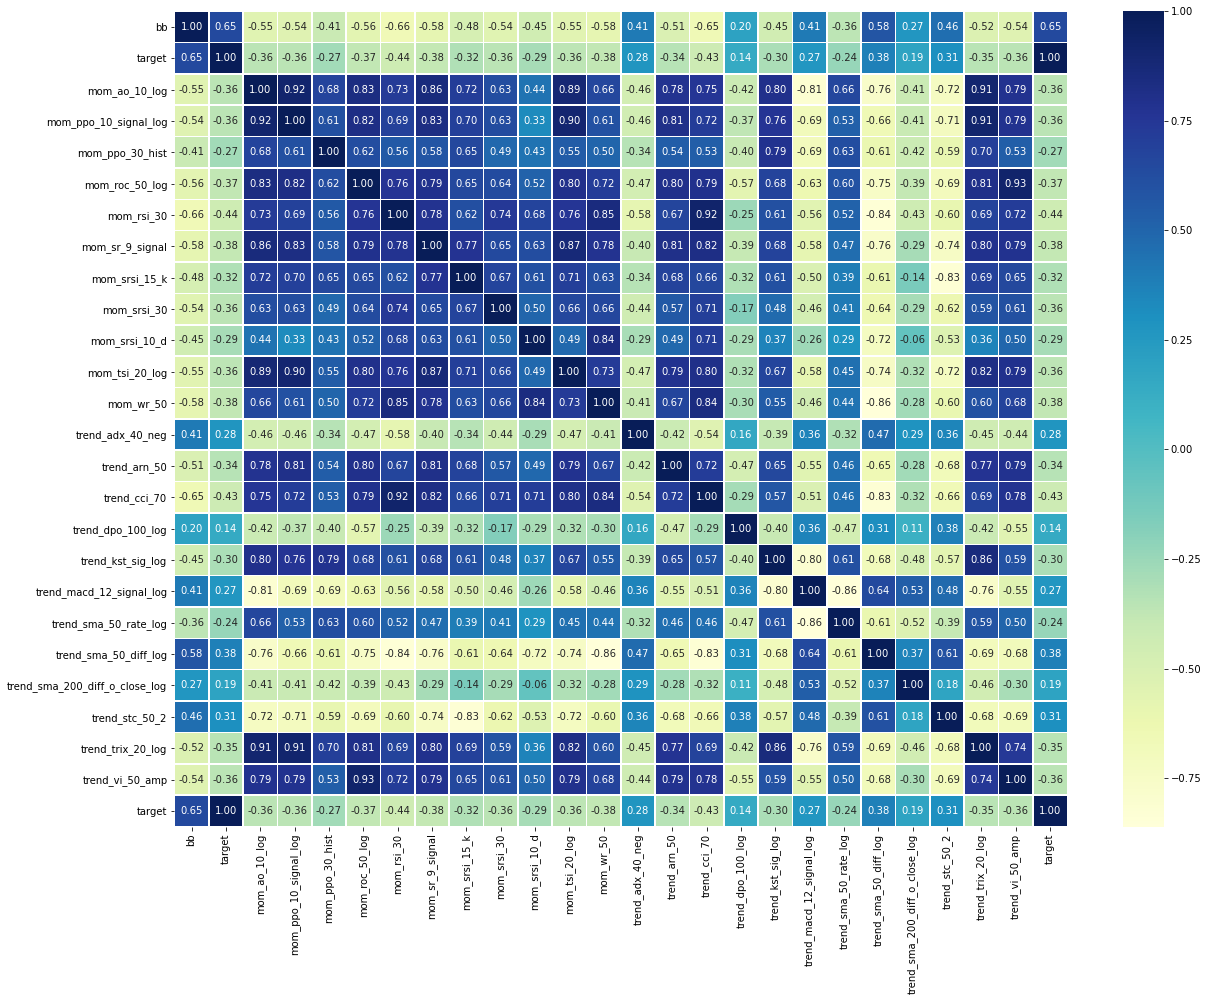

In [28]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")